# Regression in Python

<div style="color:#F00"><H1>Wichtig!: bitte ein anderes Dataset aussuchen</h1></div>

Dieses Notebook beinhaltet das Praktische Vorgehen bei dem AUfbau (nicht) linearer Regressionen. Hierfür werden die, in der Arbeit beschriebenen, Pakete NumPy, Pandas, MathPlotLib und SciPy bzw. die funktion curve_fit von dem SciPy Unterpaket SciPy.optimize genutzt. Anzumerken ist, dass die Schritte der Datensammlung und Aufbereitung hier nicht behandelt werden, da dies den Rahmen dieser Arbeit überschreitet. Im folgenden wird ein Datenset genutzt, welches frei Verfügbar auf der Website Kaggle aufzufinden ist. Anzumerken ist, das Grundsätzlich alle erkenntnisse mit dem jeweils notwendigem Fachwissen begutachtet werden müssen, um nicht ehlgeleitete Schlüsse zu ziehen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Welche Daten brauchen wir?

Um dieses Dataset zu nutzen, müssen wir es zu erst importieren. Dies geschieht mittels des Pandas Paket. Die Pandas.read...() funktionen bieten hierfür eine gute leicht nutzbare Möglichkeit

In [2]:
#url = quelle des DataSets
url = 'longley.csv'
#DF = DataFrame
df = pd.read_csv(url,header=None)
df.head()

,0,1,2,3,4,5,6
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221


Nun, da wir die Datenpunkte ausgelesen haben, ist es wichtig sich ein Bild von der abhängigen und der einen oder den mehreren unabhängigen Variablen zu machen. Falls die relevanten Variablen bekannt sind, können diese direkt dargestellt werden, falls die Aufgabenstellung jedoch auf umfasst herauszufinden womit die abhängige Variable am stärksten Korreliert um darauf aufbauend ein Regressionmodel aufzubauen muss noch ein Zwischenschritt geschehen. Hierbei muss herausgefunden werden, welche Variable am stärksten mit der abhängigen Korreliert. 

In [3]:
df.corr().style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6
0,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149,0.970899
1,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273,0.983552
2,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257,0.502498
3,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245,0.457307
4,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953,0.960391
5,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000,0.971329
6,0.970899,0.983552,0.502498,0.457307,0.960391,0.971329,1.000000


An diesem Beispiel sehen wir z.B. das unsere anhängige Variable (4) am stärksten mit der Variablen 5 Korreliert. Für die Bewertung dieser Korrelation ist ein gewisses Maß an Domainenwissen unabdingbar, da man durch das Definieren einer Abhängigen und einer unabhängigen Variablen zwar eine Kausalität impliziert, diese sich jedoch nicht durch die Betrachtung von Korrelationen nachweisen lässt. 

## Wie sehen unsere Daten aus?

In diesem Teil untersuchen wir die Daten nun, um daraufhin zu entscheiden, welche Art von Funktion nötig ist, und um für die folgenden Schätzungen eine bessere Entscheidungsgrundlage zu schaffen. Hierzu plotten wir die Datenpunkte.

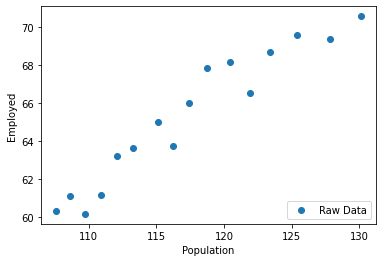

In [4]:
data = df.values
# choose the input and output variables
# garkein Plan was 4 und -1 sind und ob das die sind über die ich geschrieben habe aber das ändern wir eh noch
x, y = data[:, 4], data[:, -1]
# plot input vs output
plt.scatter(x, y, label='Raw Data')
plt.xlabel('Population')
plt.ylabel('Employed')
plt.legend(loc='lower right')

Diese Datenpunkte lassen einen Linearen Zusammenhang vermuten.

## Curve Fitting

Nun da wir entschieden haben, einen linearen Zusammenhang zu vermuten, ist es an der Zeit die nötigen Parameter für das CurveFitting zu definieren. Mindestens gebraucht werden hierbei die Daten der abhängigen und unabhängigen Variablen wie auch die jeweils gewählte Funktion. 

In [5]:
def linear_fit(x,m,b):
    return m*x + b

Die Funktion linear_fit hat als parameter an erster Stelle die unabhängige Variable x und als darauffolgende Parameter die Parameter der Funktion die opmimiert werden sollen. Nun, da die mindestanforderungen für ein CurveFitting erfüllt sind, können wir nun die Funktion nutzen.

In [6]:
optParams, covMat = curve_fit(linear_fit, x, y)

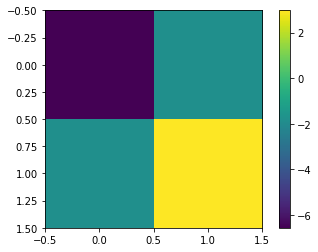

In [7]:
plt.imshow(np.log(np.abs(covMat)))
plt.colorbar()
plt.show()

Diese Funktion gibt uns 2 Dinge zurück. Einerseits optParams, welches die optimalen Parameter (für m und b aus der linear_fit() Funktion) zurückgibt und covMat, welches uns eine covarianzMatrix zurückgibt.

In [8]:
print("Opmital Parameters")
print("m: " + str(optParams[0]) + "\nb: " + str(optParams[1]))
print("")
print("Covaraianz Matrix")
print(covMat)

Opmital Parameters
m: 0.4848780927389055
b: 8.380674758772678

Covaraianz Matrix
[[ 1.41378134e-03 -1.66011861e-01]
 [-1.66011861e-01  1.95579106e+01]]


Die optimalen Parameter kann man nun für m respektive b einsetzen und die lineare Rergessionsgerade ist fertig. Die CovarianzMatrix beinhaltet den "Fehler" der Parameter, wie die Beziehung der einzelnen Parameter zueinander. In diesem Beispiel sind die Covarianzen relativ gering, jedoch kann man mit kleinen Anpassungen an unserer Ursprungsfunktion zeigen wie die Covarianzmatrix ein hilfreiches Analysetool darstellen kann. Hierzu definieren wir einen weiteren Parameter t welcher wie der Parameter b nur den Y-Achsenabschnitt beeinflusst.

## Beispiel: Fehleranalyse mittel CovarianzMatrix

In [9]:
def linear_fit_cov(x,m,b, t):
    return m*x +b + 0.0002*t

Wenn wir nun diese Funktio nutzen um das Curve Fitting durchzuführen ergeben andere Parameterwerte

In [10]:
optParams, covMat = curve_fit(linear_fit_cov, x, y)

In [11]:
print("Opmital Parameters")
print("m: " + str(optParams[0]) + "\nb: " + str(optParams[1]))
print("")
print("Covaraianz Matrix")
print(covMat)

Opmital Parameters
m: 0.48487810861760383
b: -398.9337881374815

Covaraianz Matrix
[[ 1.52253390e-03 -9.10393669e-02 -4.38713281e+02]
 [-9.11899605e-02  2.08742058e+14 -1.04371028e+18]
 [-4.37608210e+02 -1.04371028e+18  5.21855137e+21]]


Um die Covarianz Matrix lesbarer zu machen Plotten wie diese nun.

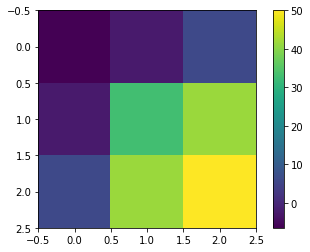

In [12]:
plt.imshow(np.log(np.abs(covMat)))
plt.colorbar()
plt.show()

Auffällig ist direkt, dass die Skala nun viel weiter ausschlägt als noch beim curve Fitting mit der linear_fit() Funktion. Die Variablen b und t haben einen großen Fehler, also ist sich die Funktion relativ unsicher ob sie den best Möglichen Fit gefunden hat. Wenn man solche Punkte findet, sollte die Funktion welche zu beginn angenommen wurde hinterfragt und wenn möglich verbessert werden.

## Vermutung aufstellen

Beim Curve Fitting ist es häufig Sinnvoll der Funktion curve_fit() erste Schätzungen für die Parameter abzugeben. Diese werden daraufhin von der Funktion mit einbezogen und helfen dabei bessere Fits für die Parameter zu finden. Hierbei ist zu beachten, dass die Qualität der Vermutung die Qualität der von curve_fit() aufgestellten Parameter beeinflusst. Der Parameter p0 der funtion curve_fit nimmt hierbei Beta, also den Vektor an Parametern an. Hierbei muss die Reihenfolge und Anzahl der Parameter die selbe sein, wie die in der definierten Funktion. Aus den scatter Plot kann man vermuten, dass die Population Anzahl doppelt so schnell steigt, wie die der Mitarbeiter, da von 110 bis 120 Population die Werte der Mitarbeiter von ca 61 auf ca 66 steigen. Unsere Vermutung für m wäre daher 0.5. Aus dem Abschnitt, den wir in den Daten haben kann man nicht leicht auf den Y-Achsen Abschnitt (also b) kommen. Aber wenn die erste Annahme von m = 0.5 genutzt wird ergibt sich schnell, dass der Y-Achsenabschnitt bei ca. 6 sein muss (Wenn man von 110 Population für alle 10 an Population weniger 5 an Employee weniger geht).

In [13]:
optParams, covMat = curve_fit(linear_fit, x, y, p0=[0.5, 6])

In [14]:
print("Opmital Parameters")
print("m: " + str(optParams[0]) + "\nb: " + str(optParams[1]))
print("")
print("Covaraianz Matrix")
print(covMat)

Opmital Parameters
m: 0.4848781016303966
b: 8.380673793627253

Covaraianz Matrix
[[ 1.41378231e-03 -1.66011970e-01]
 [-1.66011970e-01  1.95579226e+01]]


## Nicht lineare Regression

Es gibt bei nicht linearen Regressionen nicht nur die eine, wie es bei Linearen immer eine Form von y = mx + b ist. Zu den Formen nicht linearer Regressionen gehören z.B. Exponentialfunktion, logarythmusfunktionen und andere (aus dem teil von den anderen übernehmen). Wie für verschiedene nicht lineare Funktionen die Bestimmung in der Theorie aussieht wurde in vorherigen Teilen dieser Arbeit definiert, hier wird darauf eingegangen, wie nicht lineare Regressionen pratisch anzuwenden sind und an einem Beispiel erläutet.

Um mit SciPys curve_fit() Funktionen einen nicht Linearen zusammenhang darzustellen gibt es eine naheliegende Lösung. Wie in Vorherigen Teilen dieser Arbeit beschrieben brauchen wir um diese Funktion zu nutzen eine Funktion, welche den Zusammenhang zwischen den Daten beschreiben soll. Diese Funktion muss aber nicht linear sein, und kann jeden beliebigen Zusammenhang darstellen. Die allgemeine Scheitelform ist z.B. f(x) = a(x−d)² + e

In [15]:
def nonLinear_fit(x,a,b,c):
    return a*x**2 + b*x + c

In [16]:
optParams, covMat = curve_fit(nonLinear_fit, x, y)
print("Opmital Parameters")
print(optParams)
print("")
print("Covaraianz Matrix")
print(covMat)

Opmital Parameters
[-1.16963068e-02  3.25443588e+00 -1.55027991e+02]

Covaraianz Matrix
[[ 2.73504527e-05 -6.47628866e-03  3.82112152e-01]
 [-6.47628866e-03  1.53461395e+00 -9.06090933e+01]
 [ 3.82112152e-01 -9.06090933e+01  5.35368469e+03]]


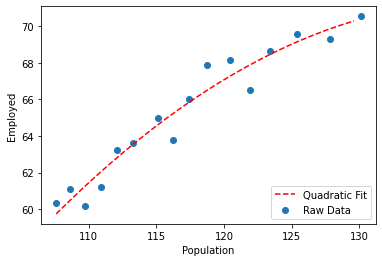

In [17]:
x_monotonic = np.arange(min(x),max(x),1)
y_fit = nonLinear_fit(x_monotonic,*optParams)
plt.plot(x_monotonic,y_fit,'--',color='red',label='Quadratic Fit')
plt.legend(loc='lower right')
plt.scatter(x, y, label='Raw Data')
plt.xlabel('Population')
plt.ylabel('Employed')
plt.legend(loc='lower right')

So würde z.B. eine nicht lineare Regression durch unsere Datenpunkte aussehen können. Wenn man sich zwischen verschiedenen Methoden der Regression unsicher ist, kann man die verschiedenen Modelle untersuchen und aus den Kennzahlen Erkentnisse gewinnen